In [1]:
#lets import necessary library


import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#import statsmodel.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#checking for the count of rows and columns 
df.shape

(1338, 7)

In [4]:
#getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#checking for null values in the dataframe
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#Checking for the duplicate values
df.duplicated(keep='last').value_counts()

False    1337
True        1
dtype: int64

In [7]:
#dropping the duplicated value
df.drop_duplicates(keep=False, inplace=True)

In [8]:
#Rechecking for the drop duplicate
df.shape

(1336, 7)

# Data Analysis

In [9]:
#statistical measures for the dataset
df.describe()

,age,bmi,children,charges
count,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.237275,30.663507,1.096557,13287.833731
std,14.038678,6.102752,1.205650,12110.702320
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.272500,0.000000,4746.875675
50%,39.000000,30.380000,1.000000,9388.753650
75%,51.000000,34.700000,2.000000,16687.364100
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#encoding sex column
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

#encoding smoker column
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#encoding region column
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast': 2, 'northwest':3}}, inplace=True)

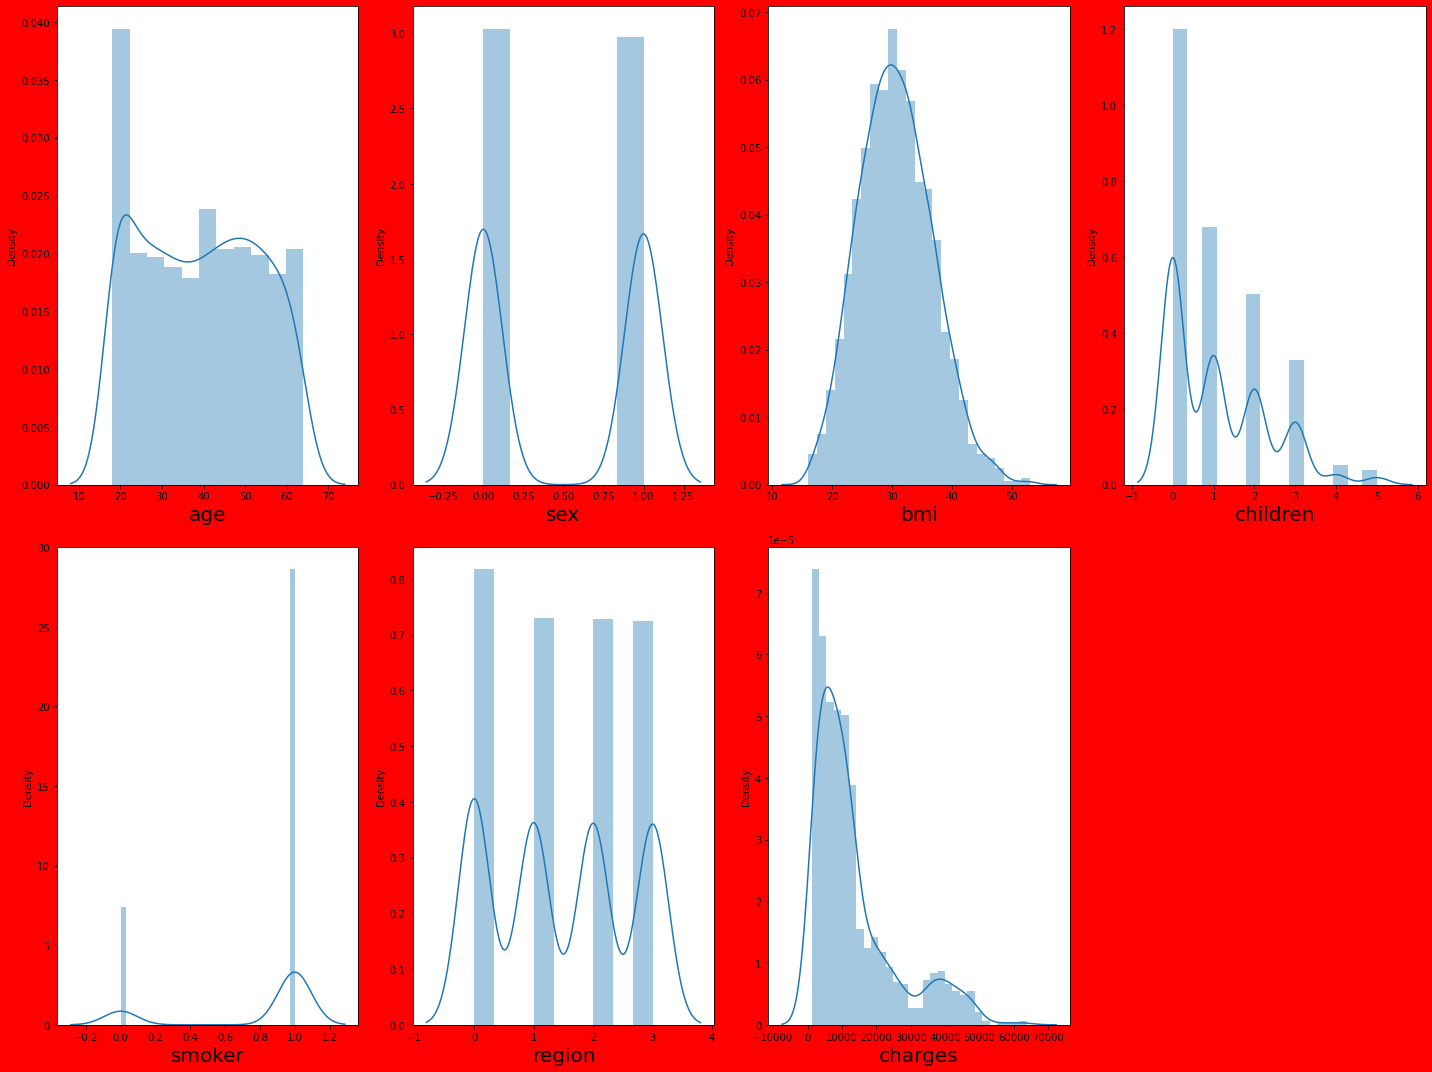

In [11]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1

for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [12]:
X = df.drop(columns='charges', axis=1)
y = df['charges']

In [13]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1336, dtype: float64

In [14]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


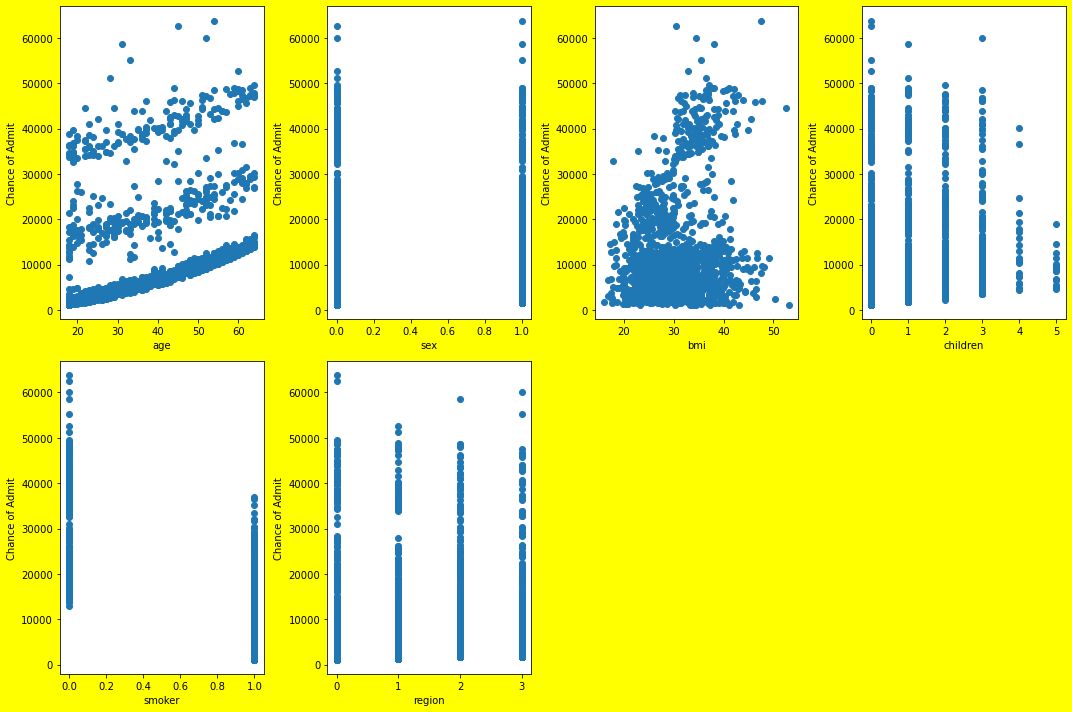

In [15]:
plt.figure(figsize = (15,10), facecolor='yellow')
plotnumber = 1

for column in X:
    if plotnumber<=8 :
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Chance of Admit',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [16]:
#data scaling. Formula z=(x-mean)/std
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled

array([[-1.44207691,  1.00902274, -0.45299913, -0.90985593, -1.96873371,
        -0.40150557],
       [-1.51333536, -0.99105794,  0.50922212, -0.08011701,  0.50794071,
        -1.28667295],
       [-0.80075085, -0.99105794,  0.38300229,  1.57936084,  0.50794071,
        -1.28667295],
       ...,
       [-1.51333536,  1.00902274,  1.01410141, -0.90985593,  0.50794071,
        -1.28667295],
       [-1.29956001,  1.00902274, -0.79723501, -0.90985593,  0.50794071,
        -0.40150557],
       [ 1.55077805,  1.00902274, -0.26121057, -0.90985593, -1.96873371,
         1.36882921]])

### Model Instantiating And Training

In [18]:
#split data into train and test. module will be build on training data and tested on the test data.
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state= 348)
y_train.head()

920     13451.12200
1315    11272.33139
955      3875.73410
1238     6985.50695
802      2103.08000
Name: charges, dtype: float64

### Predict the accurate cost of insurance given feature

In [19]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [20]:
df.tail(2)

,age,sex,bmi,children,smoker,region,charges
1336,21,1,25.80,0,1,1,2007.9450
1337,61,1,29.07,0,0,3,29141.3603


### Accuracy of the model (on testing data):

In [21]:
print('Accurate predicted insurance cost :',regression.predict(scaler.transform([[21,1, 25.80,0,1,1]])))

Accurate predicted insurance cost : [1662.53329702]


In [22]:
print('Accurate predicted insurance cost :',regression.predict(scaler.transform([[61,1, 29.07,0,0,3]])))

Accurate predicted insurance cost : [37242.98939074]


In [23]:
print("Accuracy=",regression.score(x_test,y_test)*100,"%")

Accuracy= 77.49068340834724 %


In [24]:
#saving the model tothe local file system
import pickle
pickle.dump(regression,open('reg_model','wb'))

In [25]:
loaded_model = pickle.load(open('reg_model','rb'))

a = loaded_model.predict(scaler.transform([[21,1, 25.80,0,1,1]]))

a

array([1662.53329702])

In [26]:
scaler.transform([[21,1, 25.80,0,1,1]])

array([[-1.29956001,  1.00902274, -0.79723501, -0.90985593,  0.50794071,
        -0.40150557]])

In [27]:
regression.score(x_train,y_train)

0.7404142916617074

In [28]:
y_pred = regression.predict(x_test)

In [29]:
y_pred

array([ 3.05886959e+04,  2.54806854e+04,  6.63287045e+03,  2.80084496e+04,
        1.31557265e+04,  3.55284427e+03,  3.08949067e+04,  3.78333047e+04,
        2.86516050e+04,  1.45341057e+04,  3.82243319e+04,  7.44851531e+03,
        8.56156270e+03,  5.30465906e+03,  5.92112384e+03,  6.12020560e+03,
        7.65841088e+03,  3.31354319e+04,  2.85252900e+04,  9.63823505e+03,
        2.43737243e+04,  2.50827716e+04,  1.42978194e+04,  3.53475899e+04,
       -1.62561091e+03, -3.74709165e+02,  9.82104723e+03,  5.51179291e+03,
        5.66177776e+03,  1.06461923e+04,  1.20332532e+04,  8.32402985e+03,
        5.61343617e+03,  9.76829234e+03,  6.11332104e+03,  1.16353395e+04,
        1.32215197e+04,  7.34729901e+03, -1.34883770e+03,  1.57452709e+03,
        5.47331574e+03,  3.02710809e+04,  3.92709942e+03,  1.27708553e+04,
        3.56953363e+04,  4.45383145e+03,  5.14994589e+03,  1.72142029e+04,
        6.00751645e+03,  1.63132799e+04,  8.35811591e+03,  8.85386723e+03,
        4.39101042e+03,  

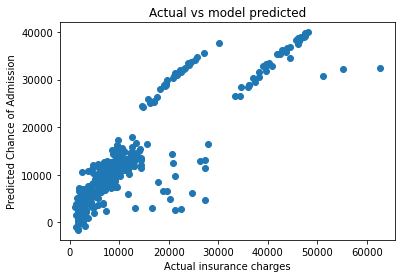

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual insurance charges')
plt.ylabel('Predicted Chance of Admission')
plt.title('Actual vs model predicted')
plt.show()

In [31]:
#Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
y_pred = regression.predict(x_test)

In [33]:
mean_absolute_error(y_test,y_pred)

4188.3266871369215

In [34]:
mean_squared_error(y_test,y_pred)

35682548.51230941

In [35]:
np.sqrt(mean_squared_error(y_test,y_pred))

5973.487131676891

### Now we sucessfully created model and our score is great so we check it for overfitting 
### To check overfitting we have to use regularization technique

#### In regularization we have 3 type but we use only 2 



### 3 types are 1) LASSO (L1 form)......................2) RIDGE (L2 FORM).............................3) ELASTIONET

In [36]:
#BASICALLY LASSO N RIDGE WILL GIVE YOU BEST LEARNING RATE THAT IS ALPHA SCORE AND TRAIN MODEL ACCORDING TO IT

In [37]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV 

### Using Lasso Model

In [38]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [39]:
alpha = lasscv.alpha_
alpha

2.210210758168331

In [40]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.210210758168331)

In [41]:
# now check r2 score

lasso_reg.score(x_test,y_test)

0.774887118807701

### Using Ridge Model

In [42]:
#Using Ridge Model

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [43]:
ridgecv.alpha_

0.001

In [44]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [45]:
# now check r2 score

ridge_model.score(x_test,y_test)

0.774906768167236

### Cross Vaildation

In [46]:
training=regression.score(x_train,y_train)
testing=regression.score(x_test,y_test)

In [47]:
training

0.7404142916617074

In [48]:
testing

0.7749068340834724

# Thus our final model gives accuracy on the test data is 77.49 %

 